2.2 파이썬으로 퍼셉트론 학습 알고리즘 구현

In [4]:
import numpy as np

In [5]:
class Perceptron(object):
    """
    -매개변수-
    eta : learning rate (0.0 ~ 1.0)
    n_iter : 훈련 데이터셋 반복 횟수 (epoch)
    random_state : 가중치 초기화를 위한 무작위 난수 생성기의 seed
    
    -속성-
    w_ : 가중치 (1d-array)
    errors_ : epoch마다 누적된 분류 오류 (list)
    
    """
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        """
        훈련 데이터 학습
        
        -매개변수-
        X : (n_samples, n_features) (2)차원의 훈련 데이터
        y : (n_samples) (1)차원의 타깃값
        
        """
        
        rgen = np.random.RandomState(self.random_state) 
        # 특정 seed를 가지는 np.random.RandomState() 객체를 만들고, 이 객체를 통해서 난수 생성
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        # 가중치 벡터 초기화
        # np.random.normal : 정규분포 난수 생성(loc=평균, scale=표준편차, size=개수)
    
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y): # xi는 스칼라가 아니고 벡터
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi 
                self.w_[0] += update
                errors += int(update != 0.0) # update가 0.0이 아니라는 것은 예측이 틀렸다는 것
            self.errors_.append(errors) # epoch 한 번 반복할 때 마다 예측이 틀린 횟수를 기록
        return self
    
    def net_input(self, X):
        # 입력 계산
        return np.dot(X, self.w_[1:]) + self.w_[0] # z = w0x0 + w1x2 + w2x2 ... 를 계산
    
    def predict(self, X):
        #단위 계단 함수를 사용하여 클래스 레이블(예측값)을 반환
        return np.where(self.net_input(X) >= 0.0, 1, -1)
        """
        np.where 값 반환 응용 (조건 True, False 위치 브로드캐스팅)
        np.where에서 두번째, 세번째 인자에 True일 때 값, False일 때 값을 써주면 브로드 캐스팅이 가능
        """

In [6]:
"""
import os
import pandas as pd
s = os.path.join('https://archive.ics.uci.edu', 'ml', 'machine-learning-databases',
                'iris', 'iris.data')
                
url에 있는 iris 데이터셋이 csv파일이 아니라 확장자가 .data인 파일이라서 read_csv 메서드로
읽어올 수 없음
"""

"\nimport os\nimport pandas as pd\ns = os.path.join('https://archive.ics.uci.edu', 'ml', 'machine-learning-databases',\n                'iris', 'iris.data')\n                \nurl에 있는 iris 데이터셋이 csv파일이 아니라 확장자가 .data인 파일이라서 read_csv 메서드로\n읽어올 수 없음\n"

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# 붓꽃 데이터셋 로드
df = pd.read_csv('C:/Users/LDW/Documents/ML/mlstudy/iris.csv', header=None, encoding='utf-8')

In [9]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


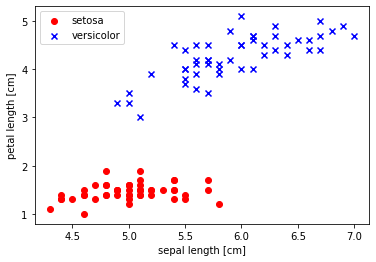

In [10]:
import matplotlib.pyplot as plt

# setosa와 versicolor를 선택
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# 꽃받침 길이와 꽃잎 길이를 추출 (2개의 feature)
X = df.iloc[0:100, [0, 2]].values 

# 산점도
plt.scatter(X[:50, 0], X[:50, 1],
           color='red', marker='o', label='setosa')

plt.scatter(X[50:100, 0], X[50:100, 1],
           color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

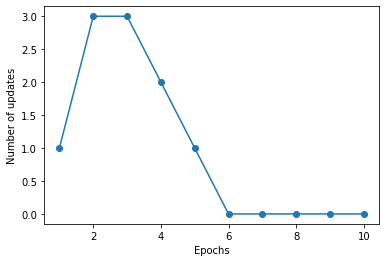

In [11]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1),
        ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [12]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    # 마커와 컬러맵 설정
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    """
    ListedColormap은 인자로 주어진 색상을 그래프상에 표시하기 위한 객체
    여기서 y의 고유값은 2개이므로, colors[0:2]의 두 개 색상인 red, blue가 
    매핑된 ListedColormap 객체가 생성된다.
    """
    
    # 결정 경계 그리기
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1 # 꽃받침 길이의 범위 설정
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1 # 꽃잎 길이의 범위 설정
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    # np.meshgrid()는 격자의 교차점 좌표를 리턴해주는 함수
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    # ravel()은 다차원 배열을 1차원 배열로 평평하게 만들어주는 함수
    # np.array([xx1.ravel(), xx2.ravel()])는 (2, 71675)의 array를 반환
    Z = Z.reshape(xx1.shape)
    # 다시 원래의 2차원 shape으로 복원
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    #contourf()는 등고선을 그리는 함수
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # 샘플의 산점도 그리기
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], # y == -1 또는 1인 데이터, 즉 setosa와 virginica를 에 대한 feature를 각각 분류
                   y=X[y == cl, 1],
                   alpha=0.8,
                   c=colors[idx],
                   marker=markers[idx],
                   label=cl,
                   edgecolor='black')
        
    dic = {'Z':Z, 'xx1':xx1, 'xx2':xx2} # Z와 xx1, xx2를 확인해보기 위한 부분
    
    return dic
    
    

C:\Users\LDW\AppData\Local\Temp/ipykernel_7548/347693484.py:34: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], # y == -1 또는 1인 데이터, 즉 setosa와 virginica를 에 대한 feature를 각각 분류


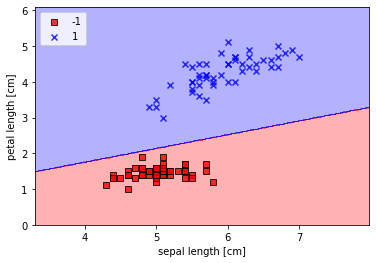

In [13]:
dic = plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

NOTE) 퍼셉트론의 수렴

퍼셉트론은 두 개의 클래스가 선형적인 초평면으로 구분될 수 있을 때, 즉 선형경계로 데이터를 분류할 수 있을 때 수렴하기 때문에 선형 결정 경계로 완벽하게 데이터의 클래스가 분류되지 않는다면 최대 epoch를 지정해서 무한루프를 방지해야 한다.

2.3 적응형 선형 뉴런(ADALINE)과 학습의 수렴

In [14]:
class AdalineGD(object):
    """
    적응형 선형 뉴런 분류기
    
    -매개변수-
    eta : learning rate (0.0 ~ 1.0)
    n_iter : 훈련 데이터셋 반복 횟수 (epoch)
    random_state : 가중치 초기화를 위한 무작위 난수 생성기의 seed
    
    -속성-
    w_ : 가중치 (1d-array)
    cost_ : epoch마다 누적된 비용 함수의 제곱합 (list)
    """
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        """
        훈련 데이터 학습

         -매개변수-
        X : (n_samples, n_features) 훈련 데이터
        y : (n_samples) 타깃값

        -반환값-
        self : object
        """
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input) # output = 𝜙(𝑧(𝑖))
            """
            self.activation은 항등 함수기 때문에 output은 net_input인 𝑧(𝑖)이다.
            즉 실제값과 예측값의 차이를 계산할 때 퍼셉트론처럼 예측 레이블 값
            (-1 혹은 1)을 사용하는 것이 아니라, y - 𝜙(𝑧(𝑖))인 실수값을 사용한다. 
            """
            errors = (y - output) # errors = (y - 𝜙(𝑧(𝑖)))
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            # self.w_[0]은 절편인데, 여기서 무엇을 의미?
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
        
    def net_input(self, X):
        """
        최종 입력인 𝑧(𝑖) 계산
        """
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        """
        선형 활성화 함수 𝜙(𝑧(𝑖))
        여기선 활성화 함수가 항등 함수기 때문에 입력값과 출력값이 같다.
        """
        return X
    
    def predict(self, X):
        """
        단위 계단 함수를 사용하여 클래스 레이블을 반환
        """
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

비용함수 J(w) = $\frac{1}{2} \sum_{i}(y^{(i)} - \phi(z^{(i)}))^{2}$

ADALINE은 퍼셉트론처럼 개별 훈련 샘플마다 평가한 후 가중치를 업데이트하지 않고 전체 훈련 데이터셋을 기반으로 gradient를 계산한다. 
배치 경사 하강법이라고도 함.

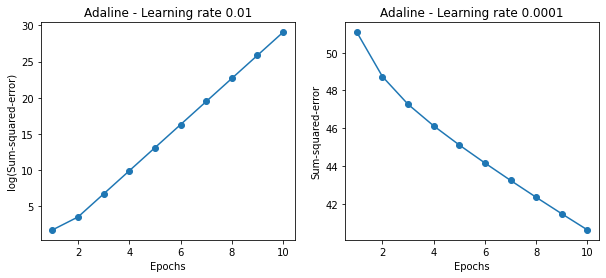

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1),
          np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')
ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1),
          ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

위 그래프의 2가지 문제
1. 왼쪽 그래프는 학습률이 너무 커서 전역 최솟값을 지나쳐버렸기 때문에 오차가 점점 커진다.
2. 오른쪽 그래프는 비용함수를 감소시키고는 있지만, 학습률이 너무 작아서 모델이 전역 최솟값에 도달하기 위해서는 많은 epoch, 즉 많은 반복 학습이 실시되어야 한다.

2.3.3 특성 스케일을 조정하여 경사 하강법 결과 향상

경사 하강법은 feature의 스케일을 조정하여 혜택을 볼 수 있는 알고리즘

표준화(standardization) : 데이터에 평균이 0이고 단위 분산을 갖는 표준 정규 분포의 성질을 부여하는 방법

표준화 특성 $x^{'} = \frac{x_{j} - \mu_{j}}{\sigma_{j}}$

𝑥𝑗는 모든 훈련 샘플에서 j번째 특성 값을 포함한 벡터

In [16]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

C:\Users\LDW\AppData\Local\Temp/ipykernel_7548/347693484.py:34: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], # y == -1 또는 1인 데이터, 즉 setosa와 virginica를 에 대한 feature를 각각 분류


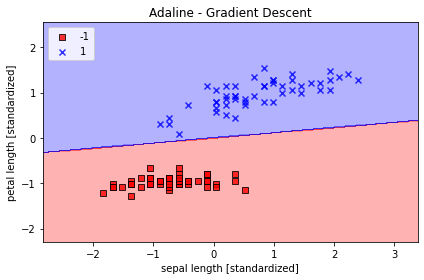

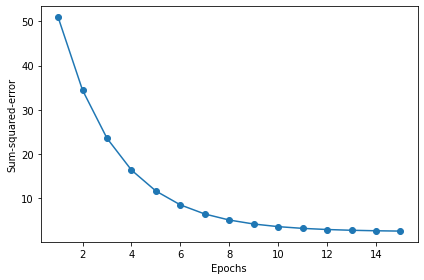

In [17]:
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
# 결정경계를 그리는 plot함수
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada.cost_) + 1),
        ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.tight_layout()
plt.show()

feature의 스케일을 조정하지 않은 데이터에 대한 결과와 비교할 때, 동일한 학습률인 0.01에서 표준화한 feature를 사용하니 비용함수가 감소했다. 

2.3.4 대규모 머신 러닝과 확률적 경사 하강법

확률적 경사 하강법은 모든 샘플 xi에 대하여 누적된 오차의 합을 기반으로 가중치를 업데이트 하는 대신 각 훈련 샘플에 대해 조금씩 가중치를 업데이트한다.

이 방법은 비선형 비용 함수를 다룰 때 얕은 지역 최솟값을 더 쉽게 탈출할 수 있다.

확률적 경사 하강법에서는 훈련 샘플 순서를 무작위하게 주입하는 것이 중요하며, 순환되지 않도록 epoch마다 훈련 데이터셋을 섞는 것이 좋다. 

In [31]:
class AdalineSGD(object):
    """
    ADApptive Linear Neuron 분류기
    
    -매개변수-
    eta: 학습률
    n_iter : 훈련 데이터셋 반복 횟수
    shuffle : True로 설정하면 같은 반복이 되지 않도록 에포크마다 훈련 데이터를 섞는다.
    (bool형 / default : True)
    random_state : 난수 생성기 seed
    
    -속성-
    w_ : 가중치 (1d-array)
    cost_ : epoch마다 누적된 비용 함수의 제곱합 (list)
    """
    
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        """
        훈련 데이터 학습

         -매개변수-
        X : (n_samples, n_features) 훈련 데이터
        y : (n_samples) 타깃값

        -반환값-
        self : object
        """
        
        self._initialize_weights(X.shape[1]) # feature 개수가 입력 인자
        self.cost_ = [] # 평균 비용
        for i in range(self.n_iter):
            if self.shuffle: # shuffle = True면, 
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
            
        return self
    
    def partial_fit(self, X, y):
        """가중치를 다시 초기화하지 않고 훈련 데이터를 학습"""
        
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
            
        return self
    
    def _shuffle(self, X, y):
        """훈련 데이터 섞기"""
        r = self.rgen.permutation(len(y))
        # y의 길이만큼의 무작위 순서의 배열 생성
    
        return X[r], y[r] # 행렬 X와 벡터 y내의 데이터를 무작위 순서의 배열로 섞는다.  
    
    def _initialize_weights(self, m):
        """ 랜덤한 작은 수로 가중치를 초기화 """
        
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """ 아달린 학습 규칙을 적용하여 가중치 업데이트 """
        
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error 
        # self.w_[0]은 절편이므로 업데이트 할 때, feature를 담고 있는 행벡터와 곱하지 않는다. 
        cost = 0.5 * error**2
    
        return cost
    
    def net_input(self, X): # X는 하나의 샘플에 대한 행벡터
        """ 최종 입력 계산 """
        
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        """ 선형 활성화 계산 """
        
        return X
    
    def predict(self, X):
        """ 단위 계단 함수를 사용하여 클래스 레이블을 반환 """
        
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

C:\Users\LDW\AppData\Local\Temp/ipykernel_7548/347693484.py:34: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], # y == -1 또는 1인 데이터, 즉 setosa와 virginica를 에 대한 feature를 각각 분류


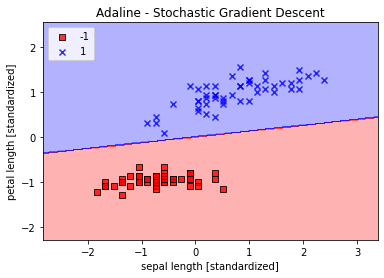

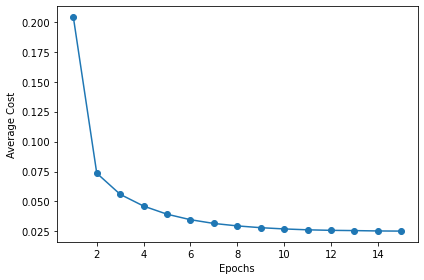

In [33]:
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.tight_layout()
plt.show()

3.1 분류 알고리즘 선택

머신러닝 알고리즘을 훈련시키기 위한 주요 단계
1. feature를 선택하고 훈련 샘플을 모은다.
2. 성능 지표를 선택한다.
3. 분류 모델과 최적화 알고리즘을 선택한다.
4. 모델의 성능을 평가한다.
5. 알고리즘을 튜닝한다. 

3.2 사이킷런 첫걸음: 퍼셉트론 훈련

In [38]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target
print('클래스 레이블:', np.unique(y))

클래스 레이블: [0 1 2]


In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
# stratify는 계층화

train_test_split 함수는 데이터셋을 훈련용과 테스트용으로 분할하기 전에 무작위로 섞는다. 

계층화는 train_test_split 함수가 훈련 데이터셋과 테스트 데이터셋의 레이블 비율을 입력 데이터셋과 동일하게 만드는 것

In [46]:
""" 입력 데이터셋의 레이블 비율대로 훈련 데이터셋과 테스트 데이터셋의 레이블이 나누어졌는지 확인 """

print('y의 레이블 카운트:', np.bincount(y))
print("y_train의 레이블 카운트:", np.bincount(y_train))
print('y_test의 레이블 카운트:', np.bincount(y_test))

y의 레이블 카운트: [50 50 50]
y_train의 레이블 카운트: [35 35 35]
y_test의 레이블 카운트: [15 15 15]


In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
# fit 메서드는 각 특성마다 평균과 표준편차를 계산
X_train_std = sc.transform(X_train)
# transform 메서드는 계산된 평균과 표준편차를 사용하여 데이터셋을 표준화한다.
X_test_std = sc.transform(X_test)
# 훈련 데이터셋과 테스트 데이터셋이 서로 같은 비율로 표준화되도록 동일한 
# 평균과 표준편차를 사용하여 표준화한다.

In [48]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [50]:
y_pred = ppn.predict(X_test_std)
print('잘못 분류된 샘플 개수: %d' % (y_test != y_pred).sum())

잘못 분류된 샘플 개수: 1


In [52]:
from sklearn.metrics import accuracy_score
print("정확도: %.3f" % accuracy_score(y_test, y_pred))

정확도: 0.978


In [54]:
print("정확도: %.3f" % ppn.score(X_test_std, y_test))
# 사이킷런의 classifier는 예측정확도를 계산하는 score 메서드를 포함하고 있다.

정확도: 0.978


과대적합(Overfitting) : 훈련 데이터에 있는 패턴은 감지하지만 본 적 없는 새로운 데이터에는 일반화되지 못하는 현상

In [73]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # 마커와 컬러맵을 설정
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 결정 경계 그리기
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    # xx1은 x축 방향, xx2는 y축 방향에 대한 교차점의 좌표 (간격은 resolution만큼)
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape) # Z는 예측값으로 벡터인데 왜 xx1과 같은 2차원으로 만드는지?
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    # xx1과 xx2 두 개의 좌표와 이러한 좌표 (xx1, xx2)의 함수값인 Z를 바탕으로 등고선을 그린다.
    # 간단히, 두 개의 X축과 이에 해당하는 Y좌표(함숫값)를 통해서 등고선을 그린다고 생각하면 된다.
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                   alpha=0.8, c=colors[idx],
                   marker=markers[idx], label=cl,
                   edgecolor='black')
        
    # 테스트 샘플을 부각시켜서 그리기
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        # 특정 샘플(하나 혹은 여러개) 선택
        
        plt.scatter(X_test[:, 0], X_test[:, 1],
                   facecolors='none', edgecolor='black', alpha=1.0,
                   linewidth=1, marker='o',
                   s=100, label='test set')
    

C:\Users\LDW\AppData\Local\Temp/ipykernel_7548/808999786.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


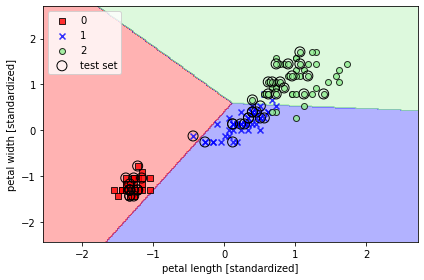

In [75]:
""" vstack과 hstack은 배열을 결합하는 함수 """
X_combined_std = np.vstack((X_train_std, X_test_std))
# vstack : 배열을 세로로 결합 (결합 시 column 개수가 일치해야함)
y_combined = np.hstack((y_train, y_test)) # y_train과 y_test는 행의 개수가 다른데 왜 가로결합을?
# hstack : 배열을 가로로 결합(옆으로) (결합 시 row 개수가 일치해야함)
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, 
                     test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

그래프에서 볼 수 있듯이, 세 개의 붓꽃 클래스는 선형 결정 경계로 완벽하게 구분되지 못한다. 퍼셉트론 알고리즘은 선형적으로 구분되지 않는 데이터셋에는 수렴하지 못하기 때문에 실전에서 잘 쓰이지 않는다.

3.3.2 다중 클래스를 위한 로지스틱 회귀 (= softmax regression)

odds ratio = $\frac{P}{1 - P}$ (의 형태)

ex. P = 양성일 확률일 때, $\frac{P}{1 - P}$ = $\frac{양성일 확률}{음성일 확률}$

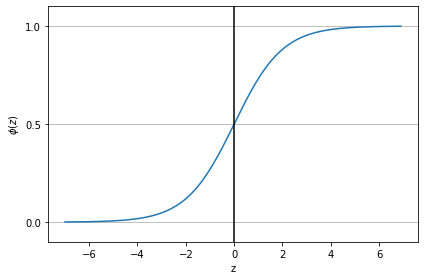

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))
z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k') # z축 0.0에 세로 기준선 그리기 
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y축의 눈금과 격자선
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

$\phi (z) = P(y=1|x;w)$ -> 시그모이드 함수의 출력은 특정 샘플이 클래스 1에 속할 확률

특정 샘플이 클래스 0에 속할 확률 -> $P(y=0|x;w) = 1 - P(y=1|x;w)$

이러한 예측 확률을 임계 함수의 입력값으로 넣어서 이진값으로 출력

3.3.3 로지스틱 비용 함수의 가중치 함수

findfont: Font family ['NanumMyeongjoOTF'] not found. Falling back to DejaVu Sans.
/var/folders/0t/m5tmk07x1jn8mbwk5mpr748h0000gp/T/ipykernel_17482/362768905.py:16: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  plt.tight_layout()
/var/folders/0t/m5tmk07x1jn8mbwk5mpr748h0000gp/T/ipykernel_17482/362768905.py:16: UserWarning: Glyph 46412 (\N{HANGUL SYLLABLE DDAE}) missing from current font.
  plt.tight_layout()
/Users/ldw/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ldw/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46412 (\N{HANGUL SYLLABLE DDAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


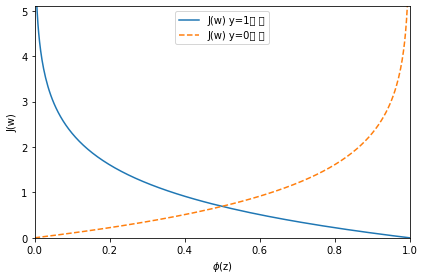

In [9]:
def cost_1(z):
    return -np.log(sigmoid(z)) # y = 1 일 때, 비용 
def cost_0(z):
    return -np.log(1 - sigmoid(z)) # y = 0 일 때, 비용
z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)
c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) y=1일 때')
c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) y=0일 때')
plt.ylim(0.0, 5.1)
plt.xlim(0, 1)
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()